# SwingUtil / Vectors tests

In [1]:
%classpath add jar "./build/libs/Chapter 02-1.0.jar"

In [2]:
import chap02.*;
import chap02.SwingUtils.*;
import chap02.VectorUtils.*;

import java.awt.Color;
import java.awt.Dimension;
import java.awt.Font;
import java.awt.Point;

In [3]:
// Environment
String.format("Running from folder %s", System.getProperty("user.dir"));

Running from folder /Users/olivierlediouris/repos/MathForProgrammersForked/Chapter 02

In [4]:
// Environment
String.format("Java version %s", System.getProperty("java.version"));

Java version 11.0.8

### Show an empty WhiteBoard, with its axes

In [5]:
private final static int WIDTH = 860;
private final static int HEIGHT = 600;

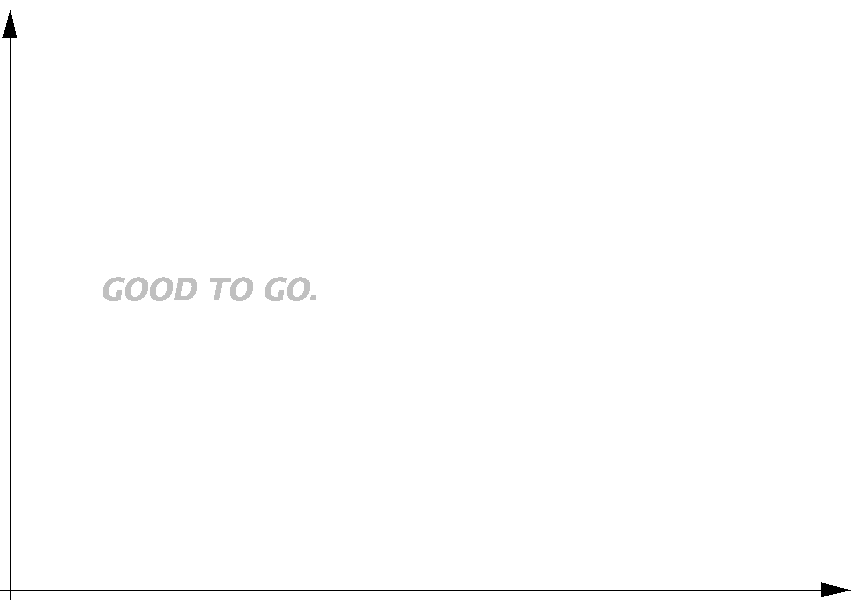

In [6]:
WhiteBoardPanel whiteBoard = new WhiteBoardPanel();
Dimension dimension = new Dimension(WIDTH, HEIGHT);
whiteBoard.setSize(dimension);
whiteBoard.setWhiteBoardWriter(g2d -> {
    g2d.setColor(Color.WHITE);
    g2d.fillRect(0, 0, dimension.width, dimension.height);
    // Vertical (left) Arrow
    WhiteBoardPanel.drawArrow(g2d,
            new Point(10, HEIGHT),
            new Point(10,  10),
            Color.BLACK);
    // Horizontal (bottom) Arrow
    WhiteBoardPanel.drawArrow(g2d,
            new Point(0, HEIGHT - 10),
            new Point(WIDTH - 10, HEIGHT - 10),
            Color.BLACK);
    g2d.setColor(Color.LIGHT_GRAY);
    g2d.setFont(g2d.getFont().deriveFont(Font.BOLD | Font.ITALIC).deriveFont(30f));
    g2d.drawString("GOOD TO GO.", 100, HEIGHT / 2);
});
whiteBoard.getImage();

Find the graphical range

In [7]:
// Get the range here
Vector2D one = new Vector2D(-1, -2);
Vector2D two = new Vector2D(3, 4);
Vector2D three = VectorUtils.toPolar(one);
Vector2D four = new Vector2D(5, 6);

GraphicRange graphicRange = VectorUtils.findGraphicRange(one, two, three, four);
double xAmplitude = graphicRange.getMaxX() - graphicRange.getMinX();
double yAmplitude = graphicRange.getMaxY() - graphicRange.getMinY();

In [8]:
double oneUnit = Math.min(WIDTH / xAmplitude, HEIGHT / yAmplitude);
String.format("One Unit: %f", oneUnit);

One Unit: 74.678472

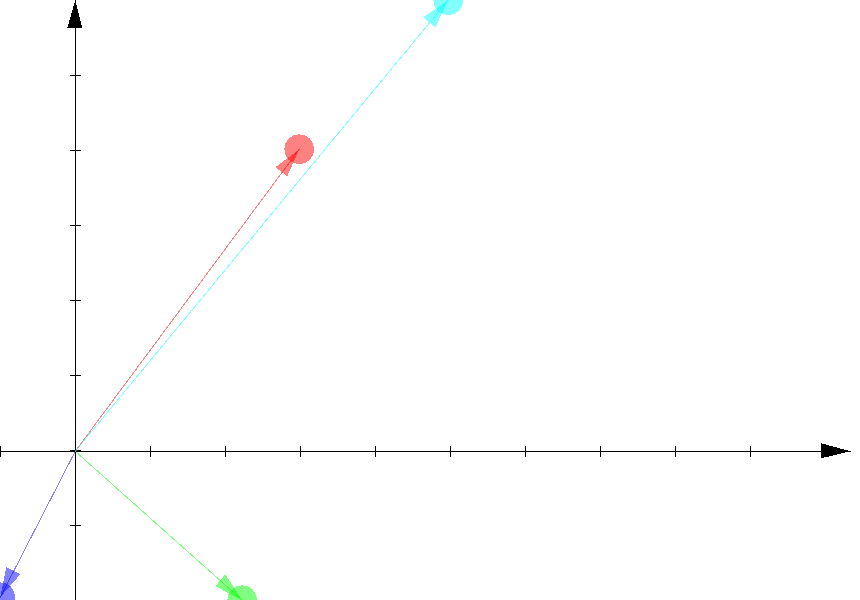

In [9]:
double x0 = Math.round(0 - graphicRange.getMinX()) * oneUnit;
double y0 = Math.round(0 - graphicRange.getMinY()) * oneUnit;
//
int CIRCLE_DIAM = 30;

whiteBoard.setWhiteBoardWriter(g2d -> {
    g2d.setColor(Color.WHITE);
    g2d.fillRect(0, 0, dimension.width, dimension.height);
    // Verticat (left) Arrow
    WhiteBoardPanel.drawArrow(g2d,
            new Point((int)Math.round(x0), HEIGHT),
            new Point((int)Math.round(x0), 0),
            Color.BLACK);

    g2d.setColor(Color.BLACK);
    int xTick = 0;
    while (xTick < WIDTH) {
      g2d.drawLine(xTick, HEIGHT - (int)Math.round(y0 - 5), 
                   xTick, HEIGHT - (int)Math.round(y0 + 5));
      xTick = (int)Math.round(xTick + oneUnit); 
    }

    // Horizontal (bottom) Arrow
    WhiteBoardPanel.drawArrow(g2d,
            new Point(0, HEIGHT - (int)Math.round(y0)),
            new Point(WIDTH - 10, HEIGHT - (int)Math.round(y0)),
            Color.BLACK);

    g2d.setColor(Color.BLACK);
    int yTick = 0;
    while (yTick < HEIGHT) {
      g2d.drawLine((int)Math.round(x0 - 5), HEIGHT - yTick, 
                   (int)Math.round(x0 + 5), HEIGHT - yTick);
      yTick = (int)Math.round(yTick + oneUnit); 
    }


    g2d.setColor(Color.LIGHT_GRAY);
    g2d.setFont(g2d.getFont().deriveFont(Font.BOLD | Font.ITALIC).deriveFont(30f));
    
    // Points
    g2d.setColor(new Color(0, 0, 255, 125)); // blue
    int pointX = (int)Math.round((one.getX() - graphicRange.getMinX()) * oneUnit);
    int pointY = (int)Math.round((one.getY() - graphicRange.getMinY()) * oneUnit);
    g2d.fillOval(pointX - (CIRCLE_DIAM / 2),
                 HEIGHT - pointY - (CIRCLE_DIAM / 2),
                 CIRCLE_DIAM, CIRCLE_DIAM);
    WhiteBoardPanel.drawArrow(g2d,
            new Point((int)Math.round(x0), HEIGHT - (int)Math.round(y0)),
            new Point(pointX, HEIGHT - pointY),
            new Color(0, 0, 255, 125));

    g2d.setColor(new Color(255, 0, 0, 125)); // red
    pointX = (int)Math.round((two.getX() - graphicRange.getMinX()) * oneUnit);
    pointY = (int)Math.round((two.getY() - graphicRange.getMinY()) * oneUnit);
    g2d.fillOval(pointX - (CIRCLE_DIAM / 2),
                 HEIGHT - pointY - (CIRCLE_DIAM / 2),
                 CIRCLE_DIAM, CIRCLE_DIAM);
    WhiteBoardPanel.drawArrow(g2d,
            new Point((int)Math.round(x0), HEIGHT - (int)Math.round(y0)),
            new Point(pointX, HEIGHT - pointY),
            new Color(255, 0, 0, 125));

    g2d.setColor(new Color(0, 255, 0, 125)); // green
    pointX = (int)Math.round((three.getX() - graphicRange.getMinX()) * oneUnit);
    pointY = (int)Math.round((three.getY() - graphicRange.getMinY()) * oneUnit);
    g2d.fillOval(pointX - (CIRCLE_DIAM / 2),
                 HEIGHT - pointY - (CIRCLE_DIAM / 2),
                 CIRCLE_DIAM, CIRCLE_DIAM);
    WhiteBoardPanel.drawArrow(g2d,
            new Point((int)Math.round(x0), HEIGHT - (int)Math.round(y0)),
            new Point(pointX, HEIGHT - pointY),
            new Color(0, 255, 0, 125));

    g2d.setColor(new Color(0, 255, 255, 125)); // cyan
    pointX = (int)Math.round((four.getX() - graphicRange.getMinX()) * oneUnit);
    pointY = (int)Math.round((four.getY() - graphicRange.getMinY()) * oneUnit);
    g2d.fillOval(pointX - (CIRCLE_DIAM / 2),
                 HEIGHT - pointY - (CIRCLE_DIAM / 2),
                 CIRCLE_DIAM, CIRCLE_DIAM);
    WhiteBoardPanel.drawArrow(g2d,
            new Point((int)Math.round(x0), HEIGHT - (int)Math.round(y0)),
            new Point(pointX, HEIGHT - pointY),
            new Color(0, 255, 255, 125));
});
whiteBoard.getImage();